In [ ]:
import warnings
warnings.filterwarnings('ignore')

import re
import copy
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

%matplotlib inline

In [ ]:
row_data = pd.read_excel("NIRS_row_data.xlsx")

In [ ]:
row_data.head()

,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Выпуск. школа,Группа,Обуч. подразд.,Фамилия,...,Дата рождения,Академ отпуск (действующий) - да / нет,Всего,Положительных,Неудовлетворительных,Дисциплины по которым получены неудовлетворительные оценки,Пропусков по дисциплинам по которым получены неудовлетворительные оценки,Всего часов по дисциплинам по которым получены неудовлетворительные оценки,Всего часов пропусков в семестре,Всего часов аудиторных занятий в семестре
0,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,Попов,...,28.07.1996,Нет,9,9,0,NaN,0,0.0,14,408.0
1,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,Кушбаков,...,26.02.1995,Нет,9,0,9,Лабораторный практикум по гидрометаллургически...,110,408.0,110,408.0
2,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,Яровая,...,15.11.1996,Нет,9,9,0,NaN,0,0.0,12,408.0
3,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,Летуев,...,07.07.1996,Нет,9,9,0,NaN,0,0.0,14,408.0
4,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,Зайцева,...,02.08.1995,Нет,9,9,0,NaN,0,0.0,4,408.0


In [ ]:
len(row_data)

8551

In [ ]:
row_data.dtypes

Форма обучения                                                                 object
Квалификация                                                                   object
Курс                                                                            int64
Специальность                                                                  object
Профиль                                                                        object
Выпуск. отдел.                                                                 object
Выпуск. школа                                                                  object
Группа                                                                         object
Обуч. подразд.                                                                 object
Фамилия                                                                        object
Имя                                                                            object
Отчество                                              

### Предобработка данных

In [ ]:
# # if 0 then...
# len(row_data["Отчество"][row_data["Отчество"].isna() == True])

In [ ]:
# # do concat without check NA values
# for i in range(len(row_data)):
#     row_data["Фамилия"][i] = row_data["Фамилия"][i] + " " + row_data["Имя"][i] + " " + row_data["Отчество"][i]
# row_data["Фамилия"]

In [ ]:
# # found duplicated фИО
# print(row_data['ФИО'][row_data['ФИО'].duplicated() == True])
# print(len(row_data['ФИО'][row_data['ФИО'].duplicated() == True]))

In [ ]:
# # duplicated observations isn't found, so, duplicated ФИО is a normal fact
# print(row_data[row_data.duplicated() == True])
# print(len(row_data[row_data.duplicated() == True]))

In [ ]:
stor1 = row_data['Всего часов аудиторных занятий в семестре'][row_data['Всего часов аудиторных занятий в семестре'].isnull() == True].index
# stor2 = row_data['Всего часов по дисциплинам по которым получены неудовлетворительные оценки'][row_data['Всего часов по дисциплинам по которым получены неудовлетворительные оценки'].isnull() == True].index

print(len(stor1))
# print(len(stor2))

81


In [ ]:
# for i in range(len(stor2)):
#     if stor2[i] in stor1:
#         print(i)
# # это значит, что все элементы множества stor2 входят в множество stor1

In [ ]:
row_data.drop(stor1, inplace=True)
row_data.reset_index(inplace=True)
len(row_data)

8470

In [ ]:
row_data.rename(columns={'index': 'studentID'}, inplace=True)
row_data

,studentID,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Выпуск. школа,Группа,Обуч. подразд.,...,Дата рождения,Академ отпуск (действующий) - да / нет,Всего,Положительных,Неудовлетворительных,Дисциплины по которым получены неудовлетворительные оценки,Пропусков по дисциплинам по которым получены неудовлетворительные оценки,Всего часов по дисциплинам по которым получены неудовлетворительные оценки,Всего часов пропусков в семестре,Всего часов аудиторных занятий в семестре
0,0,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,28.07.1996,Нет,9,9,0,NaN,0,0.0,14,408.0
1,1,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,26.02.1995,Нет,9,0,9,Лабораторный практикум по гидрометаллургически...,110,408.0,110,408.0
2,2,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,15.11.1996,Нет,9,9,0,NaN,0,0.0,12,408.0
3,3,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,07.07.1996,Нет,9,9,0,NaN,0,0.0,14,408.0
4,4,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,02.08.1995,Нет,9,9,0,NaN,0,0.0,4,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,8546,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,29.10.1995,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,2,320.0
8466,8547,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,15.01.1995,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0
8467,8548,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,05.03.1996,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0
8468,8549,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,19.06.1995,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0


In [ ]:
# drop unnecessary columns
row_data.drop(['Фамилия', 'Имя', 'Отчество', 'Дата рождения', 'Выпуск. школа'], axis=1, inplace=True)
row_data['studentID'] = pd.Series(range(len(row_data)))
row_data.columns

Index(['studentID', 'Форма обучения', 'Квалификация', 'Курс', 'Специальность',
       'Профиль', 'Выпуск. отдел.', 'Группа', 'Обуч. подразд.',
       'Форма финансирования', 'Страна', 'Гражданство', 'Пол',
       'Академ отпуск (действующий) - да / нет', 'Всего', 'Положительных',
       'Неудовлетворительных',
       'Дисциплины по которым получены неудовлетворительные оценки',
       'Пропусков по дисциплинам по которым получены неудовлетворительные оценки',
       'Всего часов по дисциплинам по которым получены неудовлетворительные оценки',
       'Всего часов пропусков в семестре',
       'Всего часов аудиторных занятий в семестре'],
      dtype='object')

In [ ]:
# change NA to -
row_data.fillna(value='-', inplace=True)
row_data

,studentID,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Группа,Обуч. подразд.,Форма финансирования,...,Пол,Академ отпуск (действующий) - да / нет,Всего,Положительных,Неудовлетворительных,Дисциплины по которым получены неудовлетворительные оценки,Пропусков по дисциплинам по которым получены неудовлетворительные оценки,Всего часов по дисциплинам по которым получены неудовлетворительные оценки,Всего часов пропусков в семестре,Всего часов аудиторных занятий в семестре
0,0,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Мужской,Нет,9,9,0,-,0,0.0,14,408.0
1,1,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на договорной основе,...,Мужской,Нет,9,0,9,Лабораторный практикум по гидрометаллургически...,110,408.0,110,408.0
2,2,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Женский,Нет,9,9,0,-,0,0.0,12,408.0
3,3,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Мужской,Нет,9,9,0,-,0,0.0,14,408.0
4,4,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Женский,Нет,9,9,0,-,0,0.0,4,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,8465,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,2,320.0
8466,8466,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0
8467,8467,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0
8468,8468,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0


In [ ]:
row_data.dtypes

studentID                                                                       int64
Форма обучения                                                                 object
Квалификация                                                                   object
Курс                                                                            int64
Специальность                                                                  object
Профиль                                                                        object
Выпуск. отдел.                                                                 object
Группа                                                                         object
Обуч. подразд.                                                                 object
Форма финансирования                                                           object
Страна                                                                         object
Гражданство                                           

In [ ]:
filtered_data = copy.copy(row_data)

In [ ]:
filtered_data

,studentID,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Группа,Обуч. подразд.,Форма финансирования,...,Пол,Академ отпуск (действующий) - да / нет,Всего,Положительных,Неудовлетворительных,Дисциплины по которым получены неудовлетворительные оценки,Пропусков по дисциплинам по которым получены неудовлетворительные оценки,Всего часов по дисциплинам по которым получены неудовлетворительные оценки,Всего часов пропусков в семестре,Всего часов аудиторных занятий в семестре
0,0,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Мужской,Нет,9,9,0,-,0,0.0,14,408.0
1,1,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на договорной основе,...,Мужской,Нет,9,0,9,Лабораторный практикум по гидрометаллургически...,110,408.0,110,408.0
2,2,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Женский,Нет,9,9,0,-,0,0.0,12,408.0
3,3,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Мужской,Нет,9,9,0,-,0,0.0,14,408.0
4,4,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,0441,Инженерная школа ядерных технологий,на основе бюджетного финансирования,...,Женский,Нет,9,9,0,-,0,0.0,4,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,8465,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,2,320.0
8466,8466,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0
8467,8467,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0
8468,8468,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,О-8КМ71,Инженерная школа энергетики,на договорной основе,...,Мужской,Нет,5,3,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0


In [ ]:
# указывем столбцы, содержащие в себе категориальные данные
cols = ['Форма обучения', 'Квалификация', 'Специальность', 'Профиль',
       'Выпуск. отдел.', 'Группа', 'Обуч. подразд.',
       'Форма финансирования', 'Страна',
       'Гражданство', 'Пол',
       'Академ отпуск (действующий) - да / нет']
for col in cols:
    series = {filtered_data[col].unique()[i]: i for i in range(len(filtered_data[col].unique()))}
    for i in range(len(filtered_data)):
        filtered_data[col][i] = series.get(filtered_data[col][i])

C:\Users\Gallad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
filtered_data.dtypes

studentID                                                                       int64
Форма обучения                                                                 object
Квалификация                                                                   object
Курс                                                                            int64
Специальность                                                                  object
Профиль                                                                        object
Выпуск. отдел.                                                                 object
Группа                                                                         object
Обуч. подразд.                                                                 object
Форма финансирования                                                           object
Страна                                                                         object
Гражданство                                           

In [ ]:
for col in cols:
    if filtered_data[col].dtype == 'object':
        filtered_data[col] = filtered_data[col].astype('Int64')
filtered_data.dtypes

studentID                                                                       int64
Форма обучения                                                                  Int64
Квалификация                                                                    Int64
Курс                                                                            int64
Специальность                                                                   Int64
Профиль                                                                         Int64
Выпуск. отдел.                                                                  Int64
Группа                                                                          Int64
Обуч. подразд.                                                                  Int64
Форма финансирования                                                            Int64
Страна                                                                          Int64
Гражданство                                           

In [ ]:
unique_disciplines = []
for i in range(len(filtered_data)):
    temp = filtered_data['Дисциплины по которым получены неудовлетворительные оценки'][i].split(', ')
    for item in temp:
        if item not in unique_disciplines:
            unique_disciplines.append(item)

In [ ]:
len(unique_disciplines)

1048

In [ ]:
# get_dummies advanced
k = 1
for disc in unique_disciplines:
    filtered_data[disc] = 0
    print(f'\r{k}', end='\r') # для прослеживания прогресса выполнения задачи
    k += 1
    for i in range(len(filtered_data['Дисциплины по которым получены неудовлетворительные оценки'])):
        temp = filtered_data['Дисциплины по которым получены неудовлетворительные оценки'][i].split(', ')
        if disc in temp:
            filtered_data[disc][i] = 1

C:\Users\Gallad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
filtered_data.drop('Дисциплины по которым получены неудовлетворительные оценки', axis=1, inplace=True)

In [ ]:
filtered_data.shape

(8470, 1069)

In [ ]:
filtered_data.dtypes[:25]

studentID                                                                       int64
Форма обучения                                                                  Int64
Квалификация                                                                    Int64
Курс                                                                            int64
Специальность                                                                   Int64
Профиль                                                                         Int64
Выпуск. отдел.                                                                  Int64
Группа                                                                          Int64
Обуч. подразд.                                                                  Int64
Форма финансирования                                                            Int64
Страна                                                                          Int64
Гражданство                                           

In [ ]:
complete_data = filtered_data.drop('studentID', axis=1)

In [ ]:
complete_data_norm = copy.copy(complete_data)

In [ ]:
# нормализуем данные
for feature in (complete_data_norm.columns):
    mean = np.mean(complete_data_norm[feature])
    std = np.std(complete_data_norm[feature])
    complete_data_norm[feature] = (complete_data_norm[feature]-mean)/std

In [ ]:
complete_data_norm

,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Группа,Обуч. подразд.,Форма финансирования,Страна,...,Менеджмент инноваций в нефтегазовой отрасли(Экз.),Основы природоресурсного права(Экз.),Управление на предприятиях нефтяной и газовой промышленности(КР),Управление на предприятиях нефтяной и газовой промышленности(Экз.),Оценка бизнеса(Экз.),Современный менеджмент(КР),Современный менеджмент(Экз.),Теория решения изобретательских задач(Зач.),Экологический менеджмент(Зач.),Основы объектно-ориентированного программирования(Зач.)
0,-0.610521,-2.054122,2.273562,-1.722088,-1.239266,-1.947748,-1.758202,-1.787462,-0.657661,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,-0.042120
1,-0.610521,-2.054122,2.273562,-1.722088,-1.239266,-1.947748,-1.758202,-1.787462,1.149733,-0.096123,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,-0.042120
2,-0.610521,-2.054122,2.273562,-1.722088,-1.239266,-1.947748,-1.758202,-1.787462,-0.657661,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,-0.042120
3,-0.610521,-2.054122,2.273562,-1.722088,-1.239266,-1.947748,-1.758202,-1.787462,-0.657661,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,-0.042120
4,-0.610521,-2.054122,2.273562,-1.722088,-1.239266,-1.947748,-1.758202,-1.787462,-0.657661,-0.096123,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,-0.042120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,3.635055,1.929487,-0.266837,1.996229,2.106646,1.181506,1.715432,1.289734,1.149733,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,23.741665
8466,3.635055,1.929487,-0.266837,1.996229,2.106646,1.181506,1.715432,1.289734,1.149733,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,23.741665
8467,3.635055,1.929487,-0.266837,1.996229,2.106646,1.181506,1.715432,1.289734,1.149733,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,23.741665
8468,3.635055,1.929487,-0.266837,1.996229,2.106646,1.181506,1.715432,1.289734,1.149733,-0.382800,...,-0.05962,-0.026625,-0.04865,-0.046148,-0.030747,-0.037667,-0.037667,-0.037667,-0.037667,23.741665


In [ ]:
# complete_data_norm.drop('label', axis=1, inplace=True)

In [ ]:
X = complete_data_norm.values
X

array([[-0.61052088, -2.05412197,  2.27356181, ..., -0.03766663,
        -0.03766663, -0.04212004],
       [-0.61052088, -2.05412197,  2.27356181, ..., -0.03766663,
        -0.03766663, -0.04212004],
       [-0.61052088, -2.05412197,  2.27356181, ..., -0.03766663,
        -0.03766663, -0.04212004],
       ...,
       [ 3.63505534,  1.92948721, -0.26683684, ..., -0.03766663,
        -0.03766663, 23.7416652 ],
       [ 3.63505534,  1.92948721, -0.26683684, ..., -0.03766663,
        -0.03766663, 23.7416652 ],
       [ 3.63505534,  1.92948721, -0.26683684, ..., -0.03766663,
        -0.03766663, 23.7416652 ]])

### Кластеризация

KMeans

In [ ]:
scores = []
j = 0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=123).fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    print(scores[j])
    j += 1

0.27162265965910715
0.272962605311582
0.27630908650866715
0.2767791379591298
0.27741712412286784
0.26214222754360966
0.1462968469431391
0.1599466938793573
0.1728551419584489


In [ ]:
# лучший результат при шести кластерах
answer1 = max(scores)
print(round(answer1, 3))

0.277


Агломеративная кластеризация

In [ ]:
lin = linkage(X, method='average', metric='cosine')
lin

array([[0.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.90000000e+01, 2.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.20000000e+01, 5.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.69290000e+04, 1.69340000e+04, 1.00417828e+00, 2.43100000e+03],
       [1.69040000e+04, 1.69350000e+04, 1.00673914e+00, 6.03900000e+03],
       [1.69360000e+04, 1.69370000e+04, 1.02863987e+00, 8.47000000e+03]])

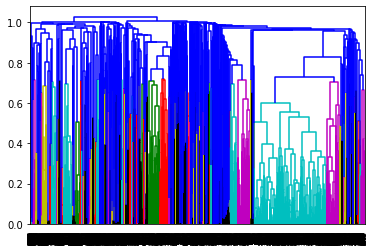

In [ ]:
dend = dendrogram(lin)

In [ ]:
label = fcluster(lin, 0.7, criterion='distance')

In [ ]:
np.unique(label)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
label.shape

(8470,)

In [ ]:
complete_data.loc[:, 'label'] = label

In [ ]:
complete_data[complete_data['label'] == 1]

,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Группа,Обуч. подразд.,Форма финансирования,Страна,...,Основы природоресурсного права(Экз.),Управление на предприятиях нефтяной и газовой промышленности(КР),Управление на предприятиях нефтяной и газовой промышленности(Экз.),Оценка бизнеса(Экз.),Современный менеджмент(КР),Современный менеджмент(Экз.),Теория решения изобретательских задач(Зач.),Экологический менеджмент(Зач.),Основы объектно-ориентированного программирования(Зач.),label
8428,2,2,1,38,153,10,521,5,1,3,...,0,0,0,1,1,1,1,1,0,1
8429,2,2,1,38,153,10,521,5,1,0,...,0,0,0,0,1,1,1,1,0,1
8430,2,2,1,38,153,10,521,5,1,0,...,0,0,0,0,1,1,1,1,0,1
8431,2,2,1,38,153,10,521,5,1,0,...,0,0,0,0,1,1,1,1,0,1
8432,2,2,1,38,153,10,521,5,1,1,...,0,0,0,1,1,1,1,1,0,1
8433,2,2,1,38,153,10,521,5,1,0,...,0,0,0,1,1,1,1,1,0,1
8434,2,2,1,38,153,10,521,5,1,0,...,0,0,0,1,1,1,1,1,0,1
8435,2,2,1,38,153,10,521,5,1,0,...,0,0,0,1,1,1,1,1,0,1
8436,2,2,1,38,153,10,521,5,1,0,...,0,0,0,1,1,1,1,1,0,1
8437,2,2,1,38,153,10,521,5,1,0,...,0,0,0,1,1,1,1,1,0,1


# Обучение машинными алгоритмами

In [ ]:
data = pd.read_excel("students_success.xlsx")

In [ ]:
data

,Unnamed: 0,Форма обучения,Квалификация,Курс,Специальность,Профиль,Выпуск. отдел.,Выпуск. школа,Группа,Обуч. подразд.,...,Неудовлетворительных,Дисциплины по которым получены неудовлетворительные оценки,Пропусков по дисциплинам по которым получены неудовлетворительные оценки,Всего часов по дисциплинам по которым получены неудовлетворительные оценки,Всего часов пропусков в семестре,Всего часов аудиторных занятий в семестре,Индекс студента,Год рождения,Успешность,Класс
0,0,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,0,Нет,0,0.0,14,408.0,0,1996,1.0,2
1,1,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,9,Лабораторный практикум по гидрометаллургически...,110,408.0,110,408.0,1,1995,0.0,0
2,2,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,0,Нет,0,0.0,12,408.0,2,1996,1.0,2
3,3,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,0,Нет,0,0.0,14,408.0,3,1996,1.0,2
4,4,Очная,Специалист,5,18.05.02 Химическая технология материалов совр...,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,0441,Инженерная школа ядерных технологий,...,0,Нет,0,0.0,4,408.0,4,1995,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8546,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,2,Научно-исследовательская (проектная) работа в ...,0,48.0,2,320.0,8546,1995,0.6,1
8547,8547,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0,8547,1995,0.6,1
8548,8548,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0,8548,1996,0.6,1
8549,8549,Очно-заочная,Магистр,2,09.04.03 Прикладная информатика,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,О-8КМ71,Инженерная школа энергетики,...,2,Научно-исследовательская (проектная) работа в ...,0,48.0,0,320.0,8549,1995,0.6,1


In [ ]:
# del students_df['Всего'] 
# del students_df['Положительных'] 
# del students_df['Неудовлетворительных'] 
# # del students_df['Успешность']
 
# # Вдобавок удалим
# del students_df['Специальность'] 
# del students_df['Выпуск. школа'] 
# del students_df['Группа'] 
# del students_df['Страна'] 
# del students_df['Дисциплины по которым получены неудовлетворительные оценки'] 
# del students_df['Индекс студента'] 
# del students_df['Год рождения'] 
# del students_df['Всего часов по дисциплинам по которым получены неудовлетворительные оценки']

data.drop(['Unnamed: 0', 'Успешность', 'Индекс студента',
           'Всего', 'Положительных', 'Неудовлетворительных', 
           'Специальность', 'Выпуск. школа', 'Группа', 'Страна', 
           'Дисциплины по которым получены неудовлетворительные оценки', 'Год рождения', 
           'Всего часов по дисциплинам по которым получены неудовлетворительные оценки', 
           'Всего часов пропусков в семестре', 'Пропусков по дисциплинам по которым получены неудовлетворительные оценки',
           'Всего часов аудиторных занятий в семестре'], axis=1, inplace=True)
data

,Форма обучения,Квалификация,Курс,Профиль,Выпуск. отдел.,Обуч. подразд.,Форма финансирования,Гражданство,Пол,Академ отпуск (действующий) - да / нет,Класс
0,Очная,Специалист,5,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,на основе бюджетного финансирования,Российская Федерация,Мужской,Нет,2
1,Очная,Специалист,5,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,на договорной основе,Российская Федерация,Мужской,Нет,0
2,Очная,Специалист,5,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,на основе бюджетного финансирования,Российская Федерация,Женский,Нет,2
3,Очная,Специалист,5,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,на основе бюджетного финансирования,Российская Федерация,Мужской,Нет,2
4,Очная,Специалист,5,Химическая технология материалов ядерно-топлив...,Отделение ядерно-топливного цикла,Инженерная школа ядерных технологий,на основе бюджетного финансирования,Республика Казахстан,Женский,Нет,2
...,...,...,...,...,...,...,...,...,...,...,...
8546,Очно-заочная,Магистр,2,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,на договорной основе,Российская Федерация,Мужской,Нет,1
8547,Очно-заочная,Магистр,2,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,на договорной основе,Российская Федерация,Мужской,Нет,1
8548,Очно-заочная,Магистр,2,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,на договорной основе,Российская Федерация,Мужской,Нет,1
8549,Очно-заочная,Магистр,2,Информационные технологии в электроэнергетике,Отделение электроэнергетики и электротехники,Инженерная школа энергетики,на договорной основе,Российская Федерация,Мужской,Нет,1


In [ ]:
# data['Всего часов аудиторных занятий в семестре'][data['Всего часов аудиторных занятий в семестре'].isna()]

In [ ]:
# data['Всего часов аудиторных занятий в семестре'].fillna(np.median(data['Всего часов аудиторных занятий в семестре'][data['Всего часов аудиторных занятий в семестре'].isna()==False]), inplace=True)

In [ ]:
# data['Всего часов аудиторных занятий в семестре'][data['Всего часов аудиторных занятий в семестре'].isna()]

In [ ]:
data_dummy = pd.get_dummies(data)

In [ ]:
data_dummy

,Курс,Класс,Форма обучения_Заочная,Форма обучения_Очная,Форма обучения_Очно-заочная,Квалификация_Бакалавр,Квалификация_Магистр,Квалификация_Специалист,Профиль_Автоматизация теплоэнергетических процессов,Профиль_Автоматизация технологических процессов и производств (в нефтегазовой отрасли),...,Гражданство_Туркменистан,Гражданство_Украина,Гражданство_Федеративная Республика Бразилия,Гражданство_Федеративная Республика Нигерия,Гражданство_Эстонская Республика,Гражданство_Южно-Африканская Республика,Пол_Женский,Пол_Мужской,Академ отпуск (действующий) - да / нет_Да,Академ отпуск (действующий) - да / нет_Нет
0,5,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,5,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,5,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,5,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,2,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8547,2,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8548,2,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8549,2,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# нормализуем данные
mean = np.mean(data_dummy[data_dummy.columns[0]])
std = np.std(data_dummy[data_dummy.columns[0]])
data_dummy[data_dummy.columns[0]] = (data_dummy[data_dummy.columns[0]]-mean)/std

In [ ]:
data_dummy

,Курс,Класс,Форма обучения_Заочная,Форма обучения_Очная,Форма обучения_Очно-заочная,Квалификация_Бакалавр,Квалификация_Магистр,Квалификация_Специалист,Профиль_Автоматизация теплоэнергетических процессов,Профиль_Автоматизация технологических процессов и производств (в нефтегазовой отрасли),...,Гражданство_Украина,Гражданство_Федеративная Республика Бразилия,Гражданство_Федеративная Республика Нигерия,Гражданство_Эстонская Республика,Гражданство_Южно-Африканская Республика,Пол_Женский,Пол_Мужской,Академ отпуск (действующий) - да / нет_Да,Академ отпуск (действующий) - да / нет_Нет,К
0,2.221251,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,2.221251
1,2.221251,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,2.221251
2,2.221251,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,2.221251
3,2.221251,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,2.221251
4,2.221251,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,2.221251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,-0.280143,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-0.280143
8547,-0.280143,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-0.280143
8548,-0.280143,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-0.280143
8549,-0.280143,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,-0.280143


In [ ]:
target = data_dummy['Класс']
data_dummy.drop(['Класс'], axis=1, inplace=True)

In [ ]:
target

0       2
1       0
2       2
3       2
4       2
       ..
8546    1
8547    1
8548    1
8549    1
8550    1
Name: Класс, Length: 8551, dtype: int64

In [ ]:
target_onehot = tf.keras.utils.to_categorical(target)
target_onehot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
values = data_dummy.values
values

array([[ 2.2212513 ,  0.        ,  1.        , ...,  0.        ,
         1.        ,  2.2212513 ],
       [ 2.2212513 ,  0.        ,  1.        , ...,  0.        ,
         1.        ,  2.2212513 ],
       [ 2.2212513 ,  0.        ,  1.        , ...,  0.        ,
         1.        ,  2.2212513 ],
       ...,
       [-0.28014289,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.28014289],
       [-0.28014289,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.28014289],
       [-0.28014289,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.28014289]])

In [ ]:
values.shape

(8551, 236)

In [ ]:
X_train, X_test, y_train_onehot, y_test_onehot = train_test_split(values, target_onehot, test_size=0.33, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.33, random_state=42)

In [ ]:
# logreg
logreg_model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(256, activation='relu', input_shape=(236,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
logreg_model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 100
logreg_model.fit(X_train, y_train_onehot,
                epochs=epochs)

Epoch 1/100
5729/5729 [==============================] - 1s 132us/sample - loss: 1.0889 - acc: 0.3479
Epoch 2/100
5729/5729 [==============================] - 0s 78us/sample - loss: 1.0812 - acc: 0.3732
Epoch 3/100
5729/5729 [==============================] - 0s 80us/sample - loss: 1.0738 - acc: 0.4011
Epoch 4/100
5729/5729 [==============================] - 0s 85us/sample - loss: 1.0665 - acc: 0.4263
Epoch 5/100
5729/5729 [==============================] - 0s 83us/sample - loss: 1.0595 - acc: 0.4571
Epoch 6/100
5729/5729 [==============================] - 1s 131us/sample - loss: 1.0528 - acc: 0.4783
Epoch 7/100
5729/5729 [==============================] - 0s 86us/sample - loss: 1.0463 - acc: 0.5020
Epoch 8/100
5729/5729 [==============================] - 1s 87us/sample - loss: 1.0402 - acc: 0.5259
Epoch 9/100
5729/5729 [==============================] - 1s 88us/sample - loss: 1.0342 - acc: 0.5418
Epoch 10/100
5729/5729 [==============================] - 1s 122us/sample - loss: 1.0285 

In [ ]:
loss, accuracy = logreg_model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"loss: {loss}")
print(f"acc: {accuracy}")

loss: 0.8717814827962262
acc: 0.6328845024108887


In [ ]:
# NN
nn_model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(256, activation='relu', input_shape=(236,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])
nn_model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

epochs = 100
nn_model.fit(X_train, y_train_onehot,
                epochs=epochs)

Epoch 1/100
5729/5729 [==============================] - 2s 327us/sample - loss: 1.0934 - acc: 0.3533
Epoch 2/100
5729/5729 [==============================] - 2s 264us/sample - loss: 1.0805 - acc: 0.4144
Epoch 3/100
5729/5729 [==============================] - 1s 230us/sample - loss: 1.0688 - acc: 0.4573
Epoch 4/100
5729/5729 [==============================] - 1s 237us/sample - loss: 1.0562 - acc: 0.5069
Epoch 5/100
5729/5729 [==============================] - 2s 279us/sample - loss: 1.0457 - acc: 0.5210
Epoch 6/100
5729/5729 [==============================] - 1s 232us/sample - loss: 1.0374 - acc: 0.5401
Epoch 7/100
5729/5729 [==============================] - 1s 230us/sample - loss: 1.0293 - acc: 0.5441
Epoch 8/100
5729/5729 [==============================] - 2s 345us/sample - loss: 1.0226 - acc: 0.5448
Epoch 9/100
5729/5729 [==============================] - 2s 277us/sample - loss: 1.0146 - acc: 0.5455
Epoch 10/100
5729/5729 [==============================] - 1s 238us/sample - loss: 

In [ ]:
loss, accuracy = nn_model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"loss: {loss}")
print(f"acc: {accuracy}")

loss: 0.8176602105736142
acc: 0.6548547148704529


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
ans2 = reg.predict(X_test)
ans2

array([1.21582031, 1.75439453, 1.87939453, ..., 0.65917969, 1.78466797,
       2.02587891])

In [ ]:
big_c = 0
small_c = 0
for item in ans2:
    if item > 2:
        big_c+=1
        print(item)
    elif item < 0:
        small_c+=1
        print(item)
    else:
        pass
print(f"Количество чисел, больше 2: {big_c}")
print(f"Количетство чисел, меньше 0: {small_c}")

166827649612.22217
2.02587890625
2.02587890625
-0.07861328125
2.3310546875
-0.56201171875
2.1865234375
2.14208984375
2.31884765625
2.10400390625
171538747409.88428
2.1865234375
2.44580078125
-0.49365234375
-0.1025390625
2.037109375
2.12744140625
2.22705078125
-0.1669921875
2.11474609375
2.08251953125
2.00830078125
-0.63671875
2.08349609375
2.22802734375
2.10400390625
2.35205078125
-0.06982421875
2.10400390625
2.0029296875
2.10400390625
2.29541015625
-0.49609375
2.041015625
2.43994140625
2.2763671875
2.33203125
2.29345703125
2.29345703125
-0.29833984375
2.07421875
2.00830078125
2.0234375
2.09765625
2.2021484375
2.2724609375
2.26708984375
-0.44189453125
2.0263671875
2.0751953125
2.2470703125
2.19677734375
2.34765625
2.06494140625
2.33203125
2.00244140625
-0.095703125
2.18212890625
2.07177734375
2.22802734375
-0.07861328125
2.34765625
2.33203125
2.08349609375
2.11376953125
2.15283203125
2.11083984375
2.1005859375
-0.64111328125
2.2373046875
2.11279296875
2.0078125
-0.49365234375
-0.496093

In [ ]:
ans2 = ans2.round()
ans2

array([1., 2., 2., ..., 1., 2., 2.])

In [ ]:
def acc_calc(arr):
    count = 0
    for i in range(arr.shape[0]):
        if arr[i] == list(y_test)[i]:
            count+=1
    print(f"acc: {count/(arr.shape[0])}")

In [ ]:
acc_calc(ans2)

acc: 0.5861091424521616


In [ ]:
clf = RandomForestClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
ans3 = clf.predict(X_test)

In [ ]:
ans3

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [ ]:
acc_calc(ans3)

acc: 0.6601700921332389


In [ ]:
clf2 = svm.SVC()
clf2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
ans4 = clf2.predict(X_test)

In [ ]:
acc_calc(ans4)

acc: 0.7562012756909993


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
ans5 = neigh.predict(X_test)

In [ ]:
acc_calc(ans5)

acc: 0.7335223245924876


In [ ]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=svm.SVC(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.7562012756909993

In [ ]:
ans6 = clf.predict(X_test)

In [ ]:
acc_calc(ans6)

acc: 0.7562012756909993


In [ ]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4), n_estimators=10, random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.6669029057406095

In [ ]:
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.7381289865343728

In [ ]:
# Total

In [ ]:
clf1 = svm.SVC()
clf1.fit(X_train, y_train)
ans1 = clf1.predict(X_test)
acc_calc(ans1)

acc: 0.7576187101346563


In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(X_train, y_train)
ans2 = clf2.predict(X_test)
acc_calc(ans2)

acc: 0.7388377037562013


In [ ]:
clf3 = RandomForestClassifier(max_depth=4, random_state=42)
clf3.fit(X_train, y_train)
ans3 = clf3.predict(X_test)
acc_calc(ans3)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
ans3.shape

(2822,)

In [ ]:
ans4 = nn_model.predict(X_test)
ans4

array([[0.20439358, 0.34230196, 0.45330447],
       [0.11335234, 0.11099374, 0.7756539 ],
       [0.17950086, 0.25610048, 0.56439865],
       ...,
       [0.47022504, 0.3293237 , 0.20045127],
       [0.10897443, 0.16716988, 0.7238556 ],
       [0.12647922, 0.16915227, 0.70436853]], dtype=float32)

In [ ]:
ans4_transform = []

for row in ans4:
    if row[0] > row[1]:
        if row[0] > row[2]:
            ans4_transform.append(0)
        else:
            ans4_transform.append(2)
            
    elif row[1] > row[0]:
        if row[1] > row[2]:
            ans4_transform.append(1)
        else:
            ans4_transform.append(2)
            
ans4_transform = np.array(ans4_transform) 
print(ans4_transform.shape)
acc_calc(ans4_transform)

(2822,)
acc: 0.648830616583983


In [ ]:
acc_calc(ans4_transform)

In [ ]:
ans_tot = []
dif_ans_counter = 0
for i in range(len(ans1)):
    if ans1[i] == ans2[i]:
        ans_tot.append(ans1[i])
    elif ans1[i] == ans3[i]:
        ans_tot.append(ans1[i])
    elif ans2[i] == ans3[i]:
        ans_tot.append(ans2[i])
    else:
        ans_tot.append(ans1[i])
        dif_ans_counter += 1

print(dif_ans_counter)
acc_calc(np.array(ans_tot))

11
acc: 0.7420269312544295


In [ ]:
for i in range(3, 16):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    ans = neigh.predict(X_test)
    print(f"Число соседей: {i}")
    acc_calc(ans)
    

Число соседей: 3
acc: 0.7005669737774628
Число соседей: 4
acc: 0.705173635719348
Число соседей: 5
acc: 0.7119064493267186
Число соседей: 6
acc: 0.7175761871013465
Число соседей: 7
acc: 0.7313961729270021
Число соседей: 8
acc: 0.7335223245924876
Число соседей: 9
acc: 0.7292700212615166
Число соседей: 10
acc: 0.7285613040396882
Число соседей: 11
acc: 0.7243090007087172
Число соседей: 12
acc: 0.7207654145995748
Число соседей: 13
acc: 0.7175761871013465
Число соседей: 14
acc: 0.7147413182140326
Число соседей: 15
acc: 0.7165131112686038
Число соседей: 16
acc: 0.7175761871013465
Число соседей: 17
acc: 0.7108433734939759
Число соседей: 18
acc: 0.7104890148830617
Число соседей: 19
acc: 0.7119064493267186
Число соседей: 20
acc: 0.7076541459957477
Число соседей: 21
acc: 0.7111977321048901
Число соседей: 22
acc: 0.7069454287739192
Число соседей: 23
acc: 0.7126151665485472
Число соседей: 24
acc: 0.7104890148830617


KeyboardInterrupt: 

##Лучшая модель - Метод опорных векторов

### Далее - будем подбирать гиперпараметры с помощью grid_search для метода опорных векторов, а также менять гиперпараметры нейросети